In [192]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,LSTM
from sklearn.metrics import mean_squared_error,r2_score
import math

In [5]:
data = pdr.get_data_tiingo('AAPL', api_key = 'ef9f83b5eb2c88c6717b0ffd4ca55e8ab654395a')

In [9]:
data.to_csv('Stock.csv')

In [11]:
data = pd.read_csv('Stock.csv')

In [13]:
data.shape

(1258, 14)

In [14]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-05-16 00:00:00+00:00,93.88,94.39,91.65,92.39,61259756,21.922242,22.041334,21.401507,21.574307,245039024,0.0,1.0
1,AAPL,2016-05-17 00:00:00+00:00,93.49,94.70,93.01,94.55,46916939,21.831172,22.113724,21.719086,22.078696,187667756,0.0,1.0
2,AAPL,2016-05-18 00:00:00+00:00,94.56,95.21,93.89,94.16,42062391,22.081032,22.232815,21.924578,21.987626,168249564,0.0,1.0
3,AAPL,2016-05-19 00:00:00+00:00,94.20,94.64,93.57,94.64,30442100,21.996967,22.099713,21.849853,22.099713,121768400,0.0,1.0
4,AAPL,2016-05-20 00:00:00+00:00,95.22,95.43,94.52,94.64,32025968,22.235151,22.284188,22.071691,22.099713,128103872,0.0,1.0


In [15]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-05-07 00:00:00+00:00,130.21,131.2582,129.475,130.85,78973273,130.21,131.2582,129.475,130.85,78973273,0.22,1.0
1254,AAPL,2021-05-10 00:00:00+00:00,126.85,129.5400,126.810,129.41,88071229,126.85,129.5400,126.810,129.41,88071229,0.00,1.0
1255,AAPL,2021-05-11 00:00:00+00:00,125.91,126.2700,122.770,123.50,126142826,125.91,126.2700,122.770,123.50,126142826,0.00,1.0
1256,AAPL,2021-05-12 00:00:00+00:00,122.77,124.6400,122.250,123.40,112172282,122.77,124.6400,122.250,123.40,112172282,0.00,1.0
1257,AAPL,2021-05-13 00:00:00+00:00,124.97,126.1500,124.260,124.58,105861339,124.97,126.1500,124.260,124.58,105861339,0.00,1.0


In [ ]:
df1 = data.close

In [45]:
mn = MinMaxScaler()
df2 = mn.fit_transform(np.array(df1).reshape(-1,1))

In [359]:
# X--99 days y-100th day
X = []
y = []
for i in range(len(df1)-100):
    X.append(df2[i:100+i,0])
    y.append(df2[i+100,0])
X = np.array(X)
y = np.array(y)

In [224]:
X_train,y_train = X[:round(len(X)*0.65)],y[:round(len(y)*0.65)]
X_test,y_test = X[round(len(X)*0.65):],y[round(len(y)*0.65):]

In [204]:
X_train = X_train.reshape(753,100,1)

In [205]:
X_test = X_test.reshape(405,100,1)

In [206]:
model = Sequential()

model.add(LSTM(50,input_shape=(100,1),return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1))

In [183]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.compile(optimizer='adam',
             loss='mean_squared_error')

In [208]:
result = model.fit(X_train,y_train,
         epochs=100,
         verbose=2,
         batch_size=64,
         validation_data=(X_test,y_test))

Epoch 1/100
12/12 - 2s - loss: 0.0107 - val_loss: 0.0414
Epoch 2/100
12/12 - 1s - loss: 0.0026 - val_loss: 0.0226
Epoch 3/100
12/12 - 1s - loss: 0.0013 - val_loss: 0.0229
Epoch 4/100
12/12 - 1s - loss: 6.8042e-04 - val_loss: 0.0178
Epoch 5/100
12/12 - 1s - loss: 4.6855e-04 - val_loss: 0.0176
Epoch 6/100
12/12 - 1s - loss: 4.3708e-04 - val_loss: 0.0176
Epoch 7/100
12/12 - 1s - loss: 4.0961e-04 - val_loss: 0.0164
Epoch 8/100
12/12 - 1s - loss: 3.9142e-04 - val_loss: 0.0161
Epoch 9/100
12/12 - 1s - loss: 3.7976e-04 - val_loss: 0.0159
Epoch 10/100
12/12 - 1s - loss: 3.6602e-04 - val_loss: 0.0155
Epoch 11/100
12/12 - 1s - loss: 3.5882e-04 - val_loss: 0.0152
Epoch 12/100
12/12 - 1s - loss: 3.4949e-04 - val_loss: 0.0149
Epoch 13/100
12/12 - 1s - loss: 3.4215e-04 - val_loss: 0.0145
Epoch 14/100
12/12 - 1s - loss: 3.3046e-04 - val_loss: 0.0142
Epoch 15/100
12/12 - 1s - loss: 3.1446e-04 - val_loss: 0.0137
Epoch 16/100
12/12 - 1s - loss: 3.0896e-04 - val_loss: 0.0135
Epoch 17/100
12/12 - 1s - los

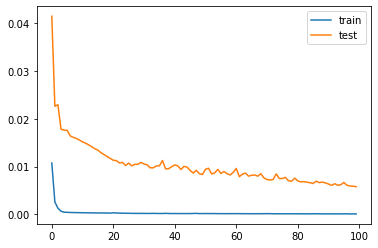

In [209]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['train','test'])

In [210]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [211]:
train_pred = mn.inverse_transform(train_pred)
test_pred = mn.inverse_transform(test_pred)

In [225]:
y_train = mn.inverse_transform(y_train.reshape(1,-1))

In [226]:
y_test = mn.inverse_transform(y_test.reshape(1,-1))

In [283]:
model.save('Stock.h5')

In [228]:
math.sqrt(mean_squared_error(y_train,train_pred.T))

4.2689934710037765

In [229]:
math.sqrt(mean_squared_error(y_test,test_pred.T))

31.543627008204

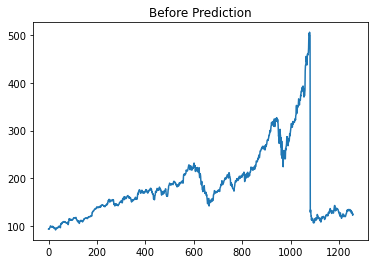

In [263]:
plt.title('Before Prediction')
plt.plot(df1)

In [ ]:
pred_f = model.predict(X[-1].reshape(-1,1))

In [363]:
a=[pred_f]
X_a = X[-1,:99]
for i in range(2,31):
    X_f = (np.append(X_a,np.array(a))).reshape(1,100,1)
    X_a = X[-1,-100:-i]
    pred_f = model.predict(X_f)
    a.append(pred_f)
    print(a[-1])

[[0.09232576]]
[[0.09373458]]
[[0.09526064]]
[[0.09560082]]
[[0.09632148]]
[[0.09758946]]
[[0.09880903]]
[[0.09951305]]
[[0.10043257]]
[[0.10143847]]
[[0.10249475]]
[[0.10357761]]
[[0.10463429]]
[[0.1056299]]
[[0.10656363]]
[[0.1074621]]
[[0.10832802]]
[[0.10911926]]
[[0.10989174]]
[[0.11062565]]
[[0.11139651]]
[[0.11209521]]
[[0.11284126]]
[[0.11355122]]
[[0.11428626]]
[[0.11503386]]
[[0.11578456]]
[[0.11653443]]
[[0.11728917]]


In [366]:
final_1 = np.array(a).reshape(30)

In [376]:
final = mn.inverse_transform(final_1.reshape(-1,1))

In [379]:
pd.Series(final.flatten())

0     129.753799
1     130.267487
2     130.850800
3     131.482666
4     131.623520
5     131.921906
6     132.446915
7     132.951889
8     133.243378
9     133.624100
10    134.040604
11    134.477951
12    134.926300
13    135.363831
14    135.776062
15    136.162674
16    136.534683
17    136.893219
18    137.220825
19    137.540680
20    137.844559
21    138.163727
22    138.453018
23    138.761917
24    139.055878
25    139.360229
26    139.669769
27    139.980606
28    140.291077
29    140.603577
dtype: float32

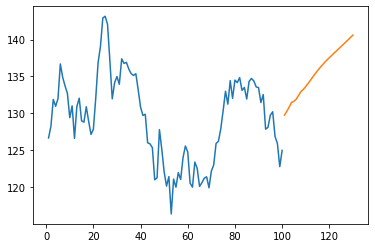

In [391]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

plt.plot(day_new,df1[1158:])
plt.plot(day_pred,pd.Series(final.flatten()))

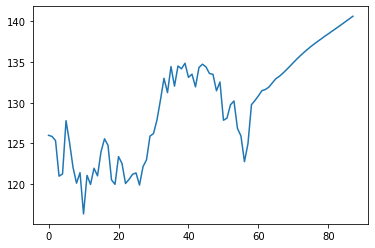

In [394]:
df3=df1.tolist()
df3.extend(list(final.flatten()))
plt.plot(df3[1200:])

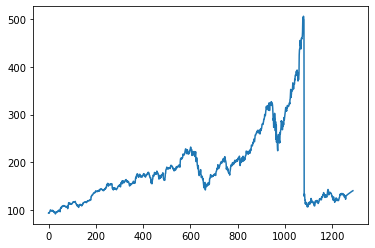

In [395]:
plt.plot(df3)